In [1]:
import pandas as pd
df = pd.read_csv('../data/exp2/sichao_20190802093325_σ_R=0_σ_x=0_x1.csv')
print(df[df['choice'] == 'SDH'].groupby('ground_truth').count())
print(df[(df['choice'] == 'SDH') & (df['confidence'] == 'high')].groupby('ground_truth').count())
print(df[(df['choice'] == 'CLU') & (df['confidence'] == 'high')].groupby('ground_truth').count())

              IND  GLO  CLU_012  CLU_120  CLU_201  SDH_012  SDH_120  SDH_201  \
ground_truth                                                                   
CS0             4    4        4        4        4        4        4        4   
CS1            13   13       13       13       13       13       13       13   
CS2            20   20       20       20       20       20       20       20   
CS3            21   21       21       21       21       21       21       21   

              choice  confidence  
ground_truth                      
CS0                4           4  
CS1               13          13  
CS2               20          20  
CS3               21          21  
              IND  GLO  CLU_012  CLU_120  CLU_201  SDH_012  SDH_120  SDH_201  \
ground_truth                                                                   
CS0             3    3        3        3        3        3        3        3   
CS1             6    6        6        6        6        6        6  

In [2]:
import numpy as np
import matplotlib.pyplot as plt
glo = np.array(['0', '1/2', '3/4', '5/6'])
bottom = np.zeros(4)
y = df[(df['choice'] == 'CLU') & (df['confidence'] == 'high')].groupby('ground_truth').count().iloc[:, 0].to_numpy()
p0 = plt.bar(glo, y)
bottom += y
y = df[(df['choice'] == 'CLU') & (df['confidence'] == 'low')].groupby('ground_truth').count().iloc[:, 0].to_numpy()
p1 = plt.bar(glo, y, bottom=bottom)
bottom += y
y = df[(df['choice'] == 'SDH') & (df['confidence'] == 'low')].groupby('ground_truth').count().iloc[:, 0].to_numpy()
p2 = plt.bar(glo, y, bottom=bottom)
bottom += y
y = df[(df['choice'] == 'SDH') & (df['confidence'] == 'high')].groupby('ground_truth').count().iloc[:, 0].to_numpy()
p3 = plt.bar(glo, y, bottom=bottom)
plt.legend((p0[0], p1[0], p2[0], p3[0]), ('CLU hi', 'CLU lo', 'SDH lo', 'SDH hi'))

In [3]:
from scipy.special import logsumexp
df['CLU'] = logsumexp(df[['CLU_012', 'CLU_120', 'CLU_201']], axis=1)
df['SDH'] = logsumexp(df[['SDH_012', 'SDH_120', 'SDH_201']], axis=1)
df['correct'] = ((df['CLU'] > df['SDH']) & (df['choice'] == 'CLU')) | ((df['CLU'] < df['SDH']) & (df['choice'] == 'SDH'))
df['discriminability'] = (df['CLU'] - df['SDH']).abs()
print(df[df['correct']].groupby('confidence')['confidence'].count() / df.groupby('confidence')['confidence'].count())

confidence
high    0.766667
low     0.725000
Name: confidence, dtype: float64


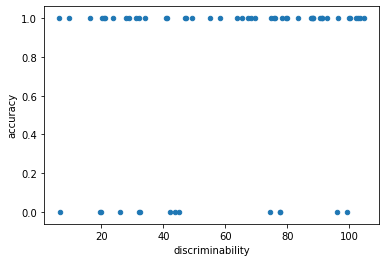

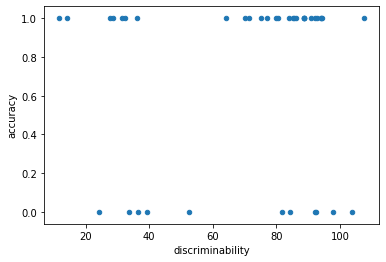

In [4]:
df['accuracy'] = df['correct'] * 1
df[df['confidence'] == 'high'].plot.scatter(x='discriminability', y='accuracy')
df[df['confidence'] == 'low'].plot.scatter(x='discriminability', y='accuracy')

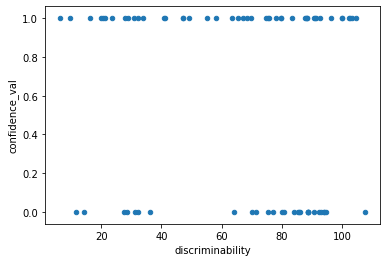

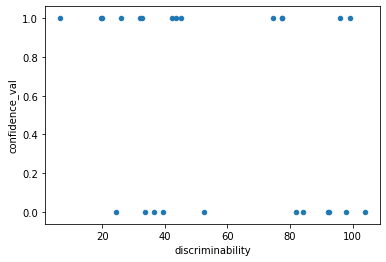

In [5]:
df['confidence_val'] = (df['confidence'] == 'high') * 1
df[df['correct']].plot.scatter(x='discriminability', y='confidence_val')
df[~df['correct']].plot.scatter(x='discriminability', y='confidence_val')

In [6]:
df['prediction'] = df['CLU'] > df['SDH']
print(df.groupby(['ground_truth', 'prediction']).count().iloc[:, 0])

ground_truth  prediction
CS0           True          25
CS1           False         25
CS2           False         25
CS3           False         25
Name: IND, dtype: int64


In [4]:
from stimuli.trial_generator import generate_trial
from stimuli.motion_structure import MotionStructure
from analysis.kalman_filter import apply_Kalman_filter_on_trial
keys = ['CLU_012', 'CLU_120', 'CLU_201', 'SDH_012', 'SDH_120', 'SDH_201']
def predict(structure, n=10, σ_R=0):
    vals = []
    for i in range(n):
        # print(i, end='')
        data = generate_trial(structure)
        t = data['t']
        x = data['φ']
        vals.append([
            sum(apply_Kalman_filter_on_trial(x, t, MotionStructure(0, 1/4), σ_R)),
            sum(apply_Kalman_filter_on_trial(x, t, MotionStructure(0, 1/4), σ_R, permutation=[1, 2, 0])),
            sum(apply_Kalman_filter_on_trial(x, t, MotionStructure(0, 1/4), σ_R, permutation=[2, 0, 1])),
            sum(apply_Kalman_filter_on_trial(x, t, MotionStructure(3/4, 1/4), σ_R)),
            sum(apply_Kalman_filter_on_trial(x, t, MotionStructure(3/4, 1/4), σ_R, permutation=[1, 2, 0])),
            sum(apply_Kalman_filter_on_trial(x, t, MotionStructure(3/4, 1/4), σ_R, permutation=[2, 0, 1])),
        ])
    vals = np.array(vals)
    df = pd.DataFrame({keys[i]: vals[:, i] for i in range(6)})
    return df

In [8]:
from utils.data import load_data
data = load_data('../data/exp2/sichao_20190802093325.dat')
print(data[1]['t'])

[0.0, 0.01992, 0.040193, 0.05999, 0.080731, 0.100347, 0.120323, 0.140207, 0.160005, 0.180456, 0.200238, 0.221451, 0.240334, 0.259754, 0.279478, 0.299856, 0.319584, 0.339751, 0.359738, 0.380645, 0.39948, 0.420053, 0.440044, 0.460652, 0.480473, 0.499951, 0.520152, 0.539538, 0.559488, 0.579512, 0.599659, 0.620066, 0.639504, 0.660568, 0.680687, 0.700078, 0.71982, 0.739723, 0.760805, 0.780337, 0.799769, 0.819861, 0.840003, 0.86002, 0.88021, 0.899824, 0.91959, 0.939669, 0.959451, 0.980462, 0.999978, 1.019808, 1.039735, 1.060815, 1.080409, 1.099972, 1.119568, 1.140458, 1.16055, 1.180231, 1.200143, 1.221997, 1.239695, 1.259637, 1.279976, 1.299868, 1.320118, 1.339422, 1.360581, 1.380381, 1.400004, 1.419911, 1.439851, 1.460758, 1.480177, 1.49946, 1.519531, 1.539754, 1.560695, 1.580169, 1.599603, 1.620369, 1.639789, 1.659778, 1.680127, 1.699831, 1.719761, 1.740148, 1.760457, 1.780379, 1.80039, 1.82017, 1.839797, 1.859833, 1.880189, 1.899501, 1.920192, 1.940072, 1.960274, 1.980044, 1.999811, 2.019

In [63]:
from time import time
n = 200
for σ_R in np.arange(0, 2, 0.5):
    for glo in [0, 0.2, 0.35, 0.55, 0.75]:
        t_s = time()
        df = predict(MotionStructure(glo, 1/4), n, σ_R=σ_R)
        df.to_csv(f'../data/exp2/sim/glo={glo:.2f}_σ={σ_R:.2f}.csv')
        print(time() - t_s)

43.92941069602966
48.32665300369263
41.34505772590637
41.5532968044281
45.33550667762756
43.22768425941467
43.963666915893555
42.80678629875183
44.44415330886841
41.87474250793457
41.4869921207428


KeyboardInterrupt: 

In [94]:
def get_accuracies(𝜃, σ):
    α, β, b = 𝜃[0], 𝜃[1], np.array([𝜃[-2]] * 3 + [𝜃[-1]] * 3)
    acc = []
    for glo in np.arange(0, 1.1, 0.1):
        df = pd.read_csv(f'../data/exp2/sim/glo={glo:.1f}_σ={σ:.1f}.csv')[keys].to_numpy()
        df = β * (df + b)
        normalizer = logsumexp(df, axis=1, keepdims=True)
        df = np.exp(df - normalizer)
        df = (α / 6 + (1 - α) * df)
        acc.append(df[:, :3].sum(axis=1).mean())
    return acc

In [9]:
np.set_printoptions(suppress=True)
print(np.array(get_accuracies([100, 0, 0], 0.0)))
print(np.array(get_accuracies([1, 0, 0], 0.0)))
print(np.array(get_accuracies([1, 0, 0], 0.5)))
print(np.array(get_accuracies([1, 0, 0], 1.0)))
print(np.array(get_accuracies([1, 0, 0], 1.5)))
print()
print(np.array(get_accuracies([0.01, 0, 0], 0.0)))
print(np.array(get_accuracies([0.35, 0, 0], 0.5)))
print(np.array(get_accuracies([0.5, 0, 0], 1.0)))
print(np.array(get_accuracies([0.5, 0, 0], 1.5)))
print()
print(np.array(get_accuracies([100, 0, 0], 1.5)))
print(np.array(get_accuracies([ 1, -3.69093523, -4.65201835], 1.5)))
print(np.array(get_accuracies([ 0.65022536, -1.79450739, -2.88192219], 1.5)))
print(np.array(get_accuracies([ 0.55248267,  1.20148657, -0.6713564 ], 1.0)))
print(np.array(get_accuracies([ 0.34140539,  3.05450939,  0.55695435], 0.5)))
print(np.array(get_accuracies([ 1.02561718e-01, -3.00505152e+02, -3.83120066e+02], 0.0)))

[1.         1.         0.99       0.895      0.31498559 0.005
 0.         0.         0.         0.         0.        ]
[1.         1.         0.99201284 0.88309976 0.31477208 0.00703878
 0.         0.         0.         0.         0.        ]
[0.83017351 0.70910751 0.6123824  0.50933487 0.35877604 0.31671359
 0.16957177 0.08065572 0.04179475 0.01431347 0.00683485]
[0.76860567 0.66783084 0.58529484 0.47804036 0.38820184 0.29646277
 0.19695176 0.12329524 0.07102877 0.04230976 0.02560894]
[0.74139429 0.63765255 0.60298053 0.50907844 0.39081979 0.30941865
 0.22438096 0.15963187 0.10187549 0.06901252 0.04252143]

[0.68913054 0.64515037 0.59496507 0.54214344 0.48616096 0.4333768
 0.38289158 0.33523571 0.2862427  0.2421925  0.20676682]
[0.72777343 0.64272404 0.58296727 0.51774416 0.4301767  0.39897482
 0.30517269 0.24313488 0.20121038 0.15372731 0.11881768]
[0.71399612 0.6315363  0.5723208  0.49274163 0.43099619 0.36059297
 0.29020338 0.23008815 0.18287561 0.14614247 0.11638387]
[0.68767827 0

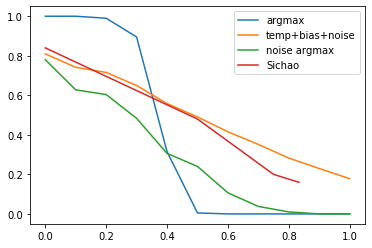

In [12]:
plt.plot(np.arange(0, 1.1, 0.1), get_accuracies([100, 0, 0], 0.0), label="argmax")
# plt.plot(np.arange(0, 1.1, 0.1), get_accuracies([1, 0, 0], 0.0), label="sum")
# plt.plot(np.arange(0, 1.1, 0.1), get_accuracies([0.01, 0, 0], 0.0), label="temp")
# plt.plot(np.arange(0, 1.1, 0.1), get_accuracies([1.02561718e-01, -3.00505152e+02, -3.83120066e+02], 0.0), label="temp+bias")
plt.plot(np.arange(0, 1.1, 0.1), get_accuracies([ 0.65022536, -1.79450739, -2.88192219], 1.5), label="temp+bias+noise")
# plt.plot(np.arange(0, 1.1, 0.1), get_accuracies([1, 0, 0], 1.5), label="noise")
plt.plot(np.arange(0, 1.1, 0.1), get_accuracies([100, 0, 0], 1.5), label="noise argmax")
plt.plot([0, 1/2, 3/4, 5/6], [21/25, 12/25, 5/25, 4/25], label="Sichao")
plt.legend()

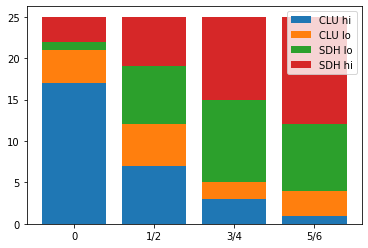

In [74]:
import numpy as np
import matplotlib.pyplot as plt
glo = np.array(['0', '1/2', '3/4', '5/6'])
bottom = np.zeros(4)
y = df[(df['choice'] == 'CLU') & (df['confidence'] == 'high')].groupby('ground_truth').count().iloc[:, 0].to_numpy()
p0 = plt.bar(glo, y)
bottom += y
y = df[(df['choice'] == 'CLU') & (df['confidence'] == 'low')].groupby('ground_truth').count().iloc[:, 0].to_numpy()
p1 = plt.bar(glo, y, bottom=bottom)
bottom += y
y = df[(df['choice'] == 'SDH') & (df['confidence'] == 'low')].groupby('ground_truth').count().iloc[:, 0].to_numpy()
p2 = plt.bar(glo, y, bottom=bottom)
bottom += y
y = df[(df['choice'] == 'SDH') & (df['confidence'] == 'high')].groupby('ground_truth').count().iloc[:, 0].to_numpy()
p3 = plt.bar(glo, y, bottom=bottom)
plt.legend((p0[0], p1[0], p2[0], p3[0]), ('CLU hi', 'CLU lo', 'SDH lo', 'SDH hi'))

In [3]:
import pandas as pd
df = pd.read_csv('../data/exp2/johannes_20190805144549_σ_R=0_σ_x=0_x1.csv')
df['accuracy'] = (df['choice'] == 'CLU') * 1.0
# print(df[df['choice'] == 'SDH'].groupby('ground_truth').count())
# print(df[(df['choice'] == 'SDH') & (df['confidence'] == 'high')].groupby('ground_truth').count())
# print(df[(df['choice'] == 'CLU') & (df['confidence'] == 'high')].groupby('ground_truth').count())
def count_ground_truth(choice, confidence):
    return np.array([
        len(df[(df['choice'] == choice) & (df['confidence'] == confidence) & (df['ground_truth'] == 'CS0')]),
        len(df[(df['choice'] == choice) & (df['confidence'] == confidence) & (df['ground_truth'] == 'CS1')]),
        len(df[(df['choice'] == choice) & (df['confidence'] == confidence) & (df['ground_truth'] == 'CS2')]),
        len(df[(df['choice'] == choice) & (df['confidence'] == confidence) & (df['ground_truth'] == 'CS3')]),
        len(df[(df['choice'] == choice) & (df['confidence'] == confidence) & (df['ground_truth'] == 'CS4')]),
    ])

count_ground_truth('SDH', 'low')

array([4, 5, 4, 7, 8])

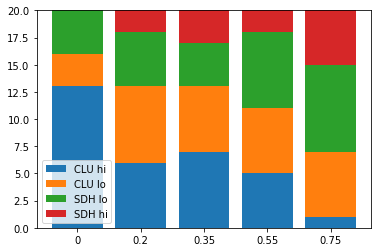

In [95]:
import numpy as np
import matplotlib.pyplot as plt
glo = np.array(['0', '0.2', '0.35', '0.55', '0.75'])
bottom = np.zeros(5)
y = count_ground_truth('CLU', 'high')
p0 = plt.bar(glo, y)
bottom += y
y = count_ground_truth('CLU', 'low')
p1 = plt.bar(glo, y, bottom=bottom)
bottom += y
y = count_ground_truth('SDH', 'low')
p2 = plt.bar(glo, y, bottom=bottom)
bottom += y
y = count_ground_truth('SDH', 'high')
p3 = plt.bar(glo, y, bottom=bottom)
plt.legend((p0[0], p1[0], p2[0], p3[0]), ('CLU hi', 'CLU lo', 'SDH lo', 'SDH hi'))

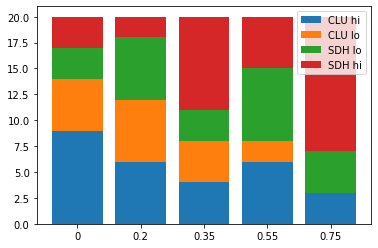

In [4]:
import pandas as pd
df = pd.read_csv('../data/exp2/pilot1_20190806143807_σ_R=1_σ_x=0_x1.csv')
df['accuracy'] = (df['choice'] == 'CLU') * 1.0
import numpy as np
import matplotlib.pyplot as plt
glo = np.array(['0', '0.2', '0.35', '0.55', '0.75'])
bottom = np.zeros(5)
y = count_ground_truth('CLU', 'high')
p0 = plt.bar(glo, y)
bottom += y
y = count_ground_truth('CLU', 'low')
p1 = plt.bar(glo, y, bottom=bottom)
bottom += y
y = count_ground_truth('SDH', 'low')
p2 = plt.bar(glo, y, bottom=bottom)
bottom += y
y = count_ground_truth('SDH', 'high')
p3 = plt.bar(glo, y, bottom=bottom)
plt.legend((p0[0], p1[0], p2[0], p3[0]), ('CLU hi', 'CLU lo', 'SDH lo', 'SDH hi'))

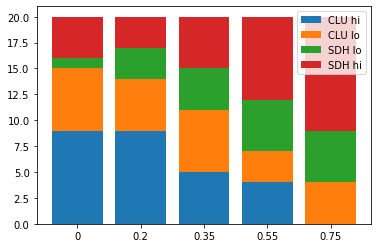

In [5]:
import pandas as pd
df = pd.read_csv('../data/exp2/sichao_σ_R=1_σ_x=0_x1.csv')
df['accuracy'] = (df['choice'] == 'CLU') * 1.0
import numpy as np
import matplotlib.pyplot as plt
glo = np.array(['0', '0.2', '0.35', '0.55', '0.75'])
bottom = np.zeros(5)
y = count_ground_truth('CLU', 'high')
p0 = plt.bar(glo, y)
bottom += y
y = count_ground_truth('CLU', 'low')
p1 = plt.bar(glo, y, bottom=bottom)
bottom += y
y = count_ground_truth('SDH', 'low')
p2 = plt.bar(glo, y, bottom=bottom)
bottom += y
y = count_ground_truth('SDH', 'high')
p3 = plt.bar(glo, y, bottom=bottom)
plt.legend((p0[0], p1[0], p2[0], p3[0]), ('CLU hi', 'CLU lo', 'SDH lo', 'SDH hi'))

(-0.1, 1.1)

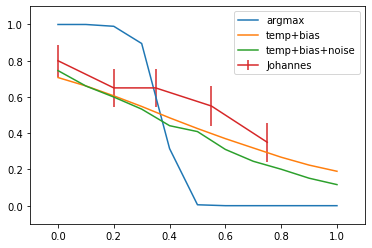

In [114]:
plt.plot(np.arange(0, 1.1, 0.1), get_accuracies([0, 100, 0, 0], 0.0), label="argmax")
# plt.plot(np.arange(0, 1.1, 0.1), get_accuracies([1, 0, 0], 0.0), label="sum")
# plt.plot(np.arange(0, 1.1, 0.1), get_accuracies([0.01, 0, 0], 0.0), label="temp")
plt.plot(np.arange(0, 1.1, 0.1), get_accuracies([8.58192498e-02, 1.23103007e-02, 9.53278304e+02, 9.53123321e+02], 0), label="temp+bias")
plt.plot(np.arange(0, 1.1, 0.1), get_accuracies([0.01153888, 0.3772154 , 5.56964478, 5.37675021], 0.5), label="temp+bias+noise")
# plt.plot(np.arange(0, 1.1, 0.1), get_accuracies([100, 0, 0], 1.5), label="noise argmax")
x = [0, 0.2, 0.35, 0.55, 0.75]
y = [df[df['ground_truth'] == f'CS{i}']['accuracy'].mean() for i in range(5)]
err = [np.sqrt(p * (1-p) / 20) for p in y]
plt.errorbar(x, y, err, label="Johannes")
plt.legend()
plt.xlim((-0.1,1.1))
plt.ylim((-0.1,1.1))

In [109]:
def get_acc_from_file(file, 𝜃, σ):
    α, β, b = 𝜃[0], 𝜃[1], np.array([𝜃[-2]] * 3 + [𝜃[-1]] * 3)
    acc = []
    for ground_truth in [f'CS{i}' for i in range(5)]:
        df = pd.read_csv(file)
        df = df[df['ground_truth'] == ground_truth][keys].to_numpy()
        df = β * (df + b)
        normalizer = logsumexp(df, axis=1, keepdims=True)
        df = np.exp(df - normalizer)
        df = (α / 6 + (1 - α) * df)
        acc.append(df[:, :3].sum(axis=1).mean())
    return acc

(-0.1, 1.1)

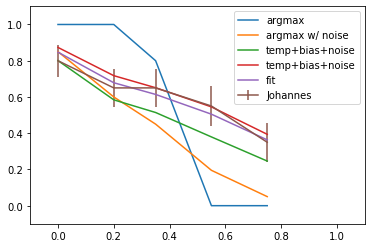

In [123]:
x = [0, 0.2, 0.35, 0.55, 0.75]
plt.plot(x, get_acc_from_file('../data/exp2/johannes_20190805144549_σ_R=0_σ_x=0_x1.csv', [0, 100, 0, 0], 0.0), label="argmax")
plt.plot(x, get_acc_from_file('../data/exp2/johannes_20190805144549_σ_R=0.5_σ_x=0_x1.csv', [0, 100, 0, 0], 0.0), label="argmax w/ noise")
# plt.plot(np.arange(0, 1.1, 0.1), get_accuracies([1, 0, 0], 0.0), label="sum")
# plt.plot(np.arange(0, 1.1, 0.1), get_accuracies([0.01, 0, 0], 0.0), label="temp")
# plt.plot(x, get_acc_from_file('../data/exp2/johannes_20190805144549_σ_R=0_σ_x=0_x1.csv', [8.58192498e-02, 1.23103007e-02, 9.53278304e+02, 9.53123321e+02], 0), label="temp+bias")
plt.plot(x, get_acc_from_file('../data/exp2/johannes_20190805144549_σ_R=0.5_σ_x=0_x1.csv', [0.01153888, 0.3772154 , 5.56964478, 5.37675021], 0.5), label="temp+bias+noise")
plt.plot(x, get_acc_from_file('../data/exp2/johannes_20190805144549_σ_R=0.5_σ_x=0_x1.csv', [0, 0.35432767, 1.2439547 , -0.92628945], 0.5), label="temp+bias+noise")
# plt.plot(x, get_acc_from_file('../data/exp2/johannes_20190805144549_σ_R=0.5_σ_x=0_x1.csv', [0.26332449, 0.95086268, 6.42637052, 4.52002478], 0.5), label="fit w/ lapse")
plt.plot(x, get_acc_from_file('../data/exp2/johannes_20190805144549_σ_R=0.5_σ_x=0_x1.csv', [0.01,       0.33800941, 1.68345691, 0], 0.5), label="fit")
# plt.plot(np.arange(0, 1.1, 0.1), get_accuracies([100, 0, 0], 1.5), label="noise argmax")
y = [df[df['ground_truth'] == f'CS{i}']['accuracy'].mean() for i in range(5)]
err = [np.sqrt(p * (1-p) / 20) for p in y]
plt.errorbar(x, y, err, label="Johannes")
plt.legend()
plt.xlim((-0.1,1.1))
plt.ylim((-0.1,1.1))